<h1>IMPORTING THE DEPENDENCIES|</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>DATA COLLECTION & PROCESSING</h1>

In [2]:
data= pd.read_csv("C:/salesprediction/advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#first thing is to check the number of rows and columns 
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<h1>HANDLING THE MISSING VALUES </h1>

In [8]:
#So after checking the info some values are missing so let us check the missing values in each column
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<h1>DATA ANALYSIS</h1>

In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<h1>DATA VISUALIZATION</h1>

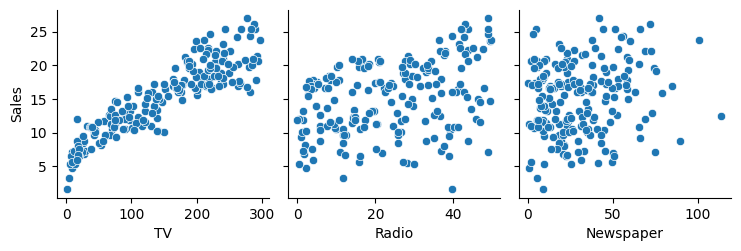

In [12]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], kind='scatter')


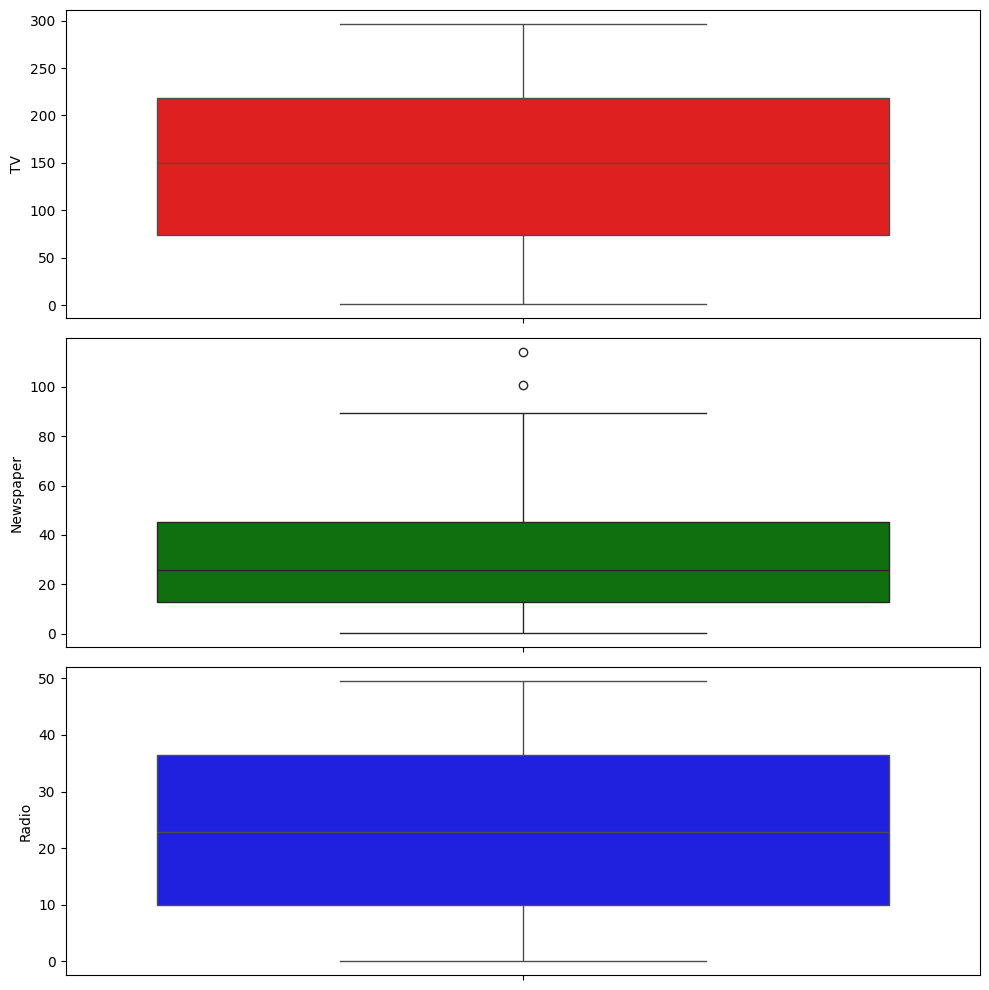

In [13]:
fig, axs = plt.subplots(3, figsize=(10, 10))  # Correct tuple for figsize and proper variable assignment
sns.boxplot(data['TV'], color='red', ax=axs[0])  # Use `color='red'` and proper list indexing for axs
sns.boxplot(data['Newspaper'], color='green', ax=axs[1])  # Change to axs[1] for the second plot
sns.boxplot(data['Radio'], color='blue', ax=axs[2])  # Use axs[2] for the third plot
plt.tight_layout()  # Adjust layout to prevent overlap


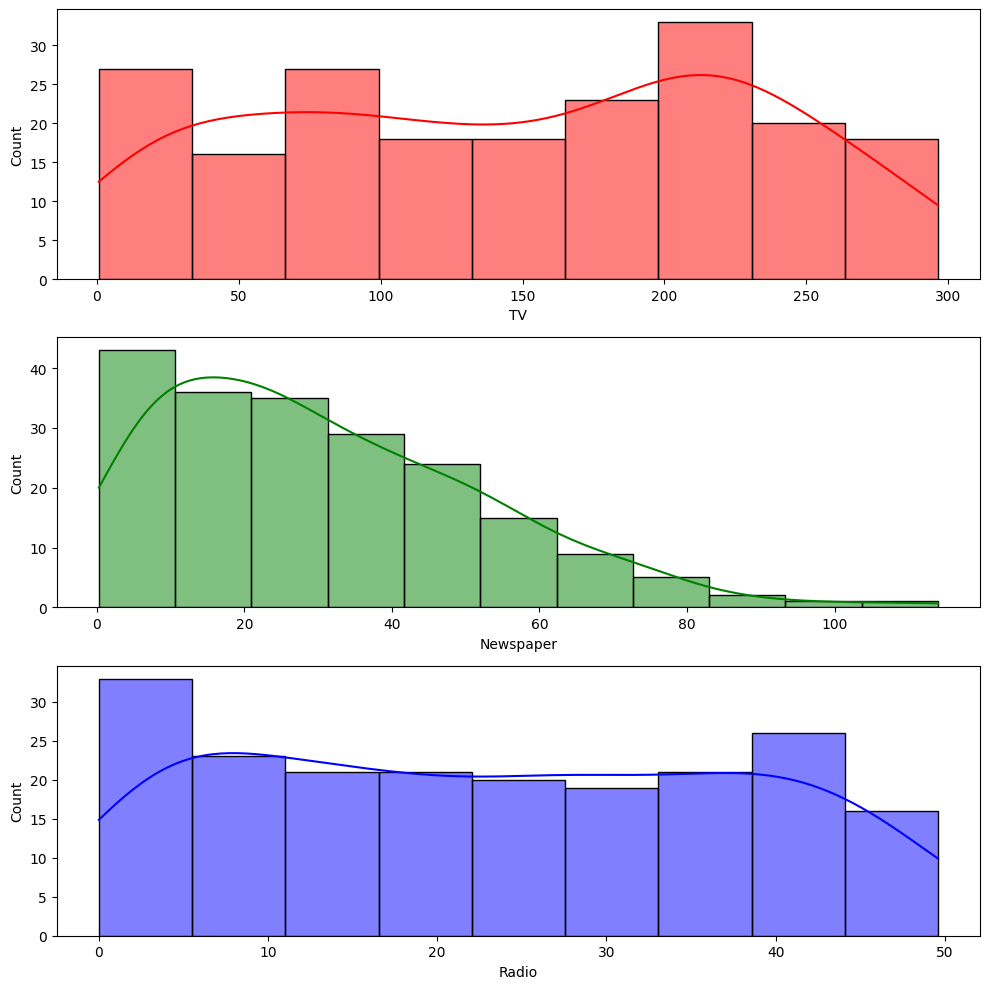

In [14]:
fig, axs = plt.subplots(3, figsize=(10, 10))  # Correct tuple for figsize
sns.histplot(data['TV'], color='red', kde=True, ax=axs[0])  # Changed adv to data
sns.histplot(data['Newspaper'], color='green', kde=True, ax=axs[1])  # Fixed kde parameter and data name
sns.histplot(data['Radio'], color='blue', kde=True, ax=axs[2])  # Changed ax placement and fixed data name
plt.tight_layout()  # Correct layout adjustment method

<Axes: >

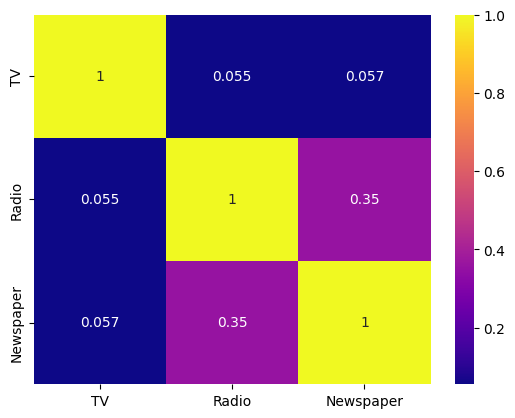

In [15]:
# Compute the correlation matrix for the selected features
corr = data[['TV', 'Radio', 'Newspaper']].corr()

# Create a heatmap to visualize the correlation matrix
# 'annot=True' displays the correlation values on the heatmap
# 'cmap="plasma"' sets the color map for the heatmap
sns.heatmap(corr, annot=True, cmap='plasma')


<h1>Model Selection and Data Fitting</h1>

In [21]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Importing necessary libraries for model selection, regression, and performance evaluation
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model for prediction
from sklearn.metrics import mean_squared_error  # Evaluates the model's performance


In [24]:
# Define the feature columns (X) and target variable (y)
X_test = data[['TV', 'Radio', 'Newspaper']]  # Features: TV, Radio, Newspaper
y_test = data['Sales']  # Target variable: Sales


In [26]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 547.0 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/9.8 MB 547.0 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/9.8 MB 547.0 kB/s eta 0:00:17
   --- ------------------------------------ 0.8/9.8 MB 465.9 kB/s eta 0:00:20
   --- ------------------------------------ 0.8/9.8 MB 465.9 kB/s eta 0:00:20
   ---- ----------------------------------- 1.0/9.8 MB 499.5 kB/s eta 0:00:18
   ---- ----------------------------------- 1.0/9.8 MB 499.5 kB/s eta 0:00:18
   ---- --------------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import statsmodels.api as sm


In [29]:
# Add a constant to the feature set for the intercept term in the regression model
X1_test = sm.add_constant(X_test)  # Adds a constant column (intercept) to the feature set

# Define the regression model using Ordinary Least Squares (OLS)
reg = sm.OLS(y_test, X1_test)  # y_test is the target, X1_test is the features with a constant

# Fit the regression model to the data
model = reg.fit()  # Fit the model to the data

# Display the summary of the regression results
print(model.summary())  # Prints the model summary with statistical details


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           8.13e-99
Time:                        00:58:57   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [30]:
residual = model.resid
residual

0      0.879028
1     -0.868248
2      1.503791
3     -0.812447
4      2.255863
         ...   
195    0.494510
196    3.719059
197   -0.459287
198    0.917780
199    0.214880
Length: 200, dtype: float64

<h1>MODEL TRAINING</h1>

In [31]:
# Split the data into training and testing sets
# x_train, x_test: Features for training and testing
# y_train, y_test: Target values for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=22)

# Explanation:
# - X_test is the feature data for testing
# - y_test is the target data for testing
# - test_size=0.2 means 20% of the data will be used for testing, and 80% for training
# - random_state=22 ensures reproducibili


In [32]:
# Display the lengths of the training and testing sets
print(len(x_train), len(x_test), len(y_train), len(y_test))


160 40 160 40


In [33]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(x_train, y_train)

# Explanation:
# - lr = LinearRegression() initializes the linear regression model.
# - lr.fit(x_train, y_train) trains the model using the training data (x_train for features and y_train for the target).


LinearRegression()

In [34]:
y_predict=lr.predict(x_test)
y_predict

array([11.50507377, 12.84657448, 10.04888489, 25.09113852, 17.37413795,
        8.05165564,  6.34463349,  8.52288741, 20.86952766, 10.67375447,
        6.90960915, 21.3370343 , 21.14114468, 19.63689246, 15.26478613,
       10.59635524, 21.76659335, 23.73688945, 12.24645122,  9.96345917,
       16.48537769, 20.26806554, 20.25869843, 15.95683049, 15.8195745 ,
       18.01683959, 12.26397709,  9.64733425, 17.92498036, 23.68316413,
       13.2979892 , 17.52679223,  8.84379613, 13.26050311,  9.7435341 ,
       10.59426893, 16.60937563, 18.29939873, 11.2821882 ,  9.37792978])

In [35]:
y_test

144    12.3
157    10.1
32     13.2
98     25.4
163    18.0
78      5.3
91      7.3
170     8.4
124    19.7
75      8.7
189     6.7
176    20.2
104    20.7
20     18.0
87     16.0
46     10.6
128    24.7
36     25.4
135    11.6
12      9.2
194    17.3
92     19.4
142    20.1
160    16.4
50     16.4
199    18.4
73     11.0
166     8.0
41     17.1
30     21.4
161    13.3
3      16.5
66     11.0
180    15.5
191    11.9
13     13.7
99     17.2
153    16.0
6      11.8
158     7.3
Name: Sales, dtype: float64